The Sparks Foundation-GRIP-Data Science and Business Analytics-JUNE 2023
TASK 1 : Prediction using supervised ML
Author : ZAIN ABDUR RAZZAK
Dataset used: Student Scores
It can be downloaded through the following link - http://bit.ly/w-data
Problem Statement(s) :
Predict the percentage of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?

In [2]:
# Importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading dataset from Online Source
Link_Data_Source = "http://bit.ly/w-data"
data = pd.read_csv(Link_Data_Source)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Data Exploration**

In [4]:
# Show shape of dataset
data.shape

(25, 2)

In [5]:
# Check missed values
data.isna().sum()


Hours     0
Scores    0
dtype: int64

In [6]:
# Check Duplicates records
data.duplicated().sum()

0

In [7]:
# Show description of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Find the correlation among the columns in the Dataset using pearson method.
data.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Let's plot our data points on 2-D graph

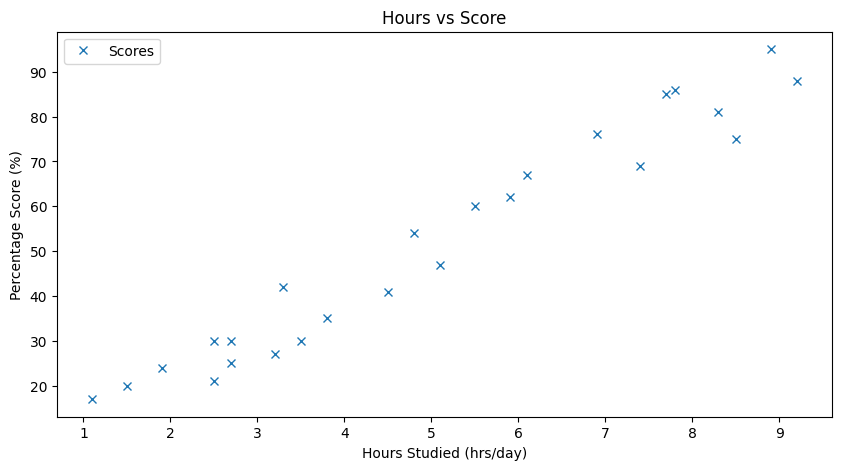

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='x', figsize =(10,5))
plt.title('Hours vs Score')
plt.xlabel('Hours Studied (hrs/day)')
plt.ylabel('Percentage Score (%)')
plt.show()

**It's observed that there is a positive correlation between the number of hours studied and percentage of score.**

### **Data Preprocessing**

Divide dataset into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Split this data into training and test sets using Scikit-Learn's built-in train_test_split():

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=42)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# The coefficients
print("Coefficients: ", model.coef_[0])
print("Intercept: ", model.intercept_)


Coefficients:  9.682078154455697
Intercept:  2.826892353899737


### Plot outputs

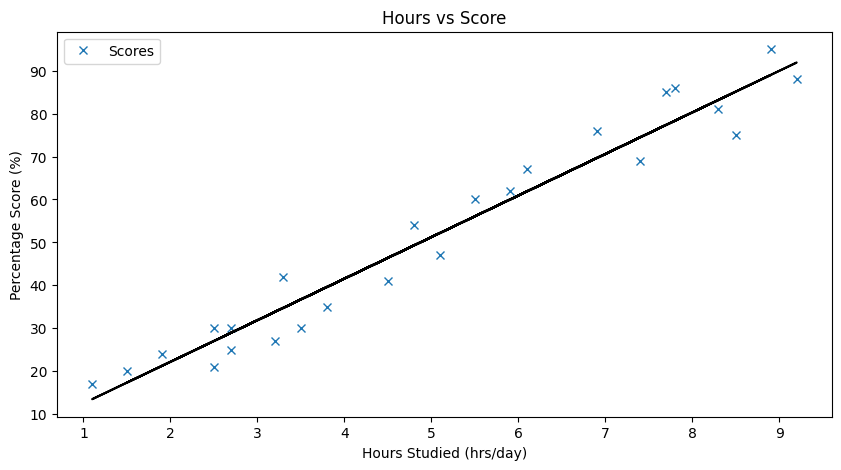

In [14]:
# Plotting the regression line
line = model.coef_ * X + model.intercept_

# Plotting for the test data
data.plot(x='Hours', y='Scores', style='x', figsize =(10,5))
plt.plot(X, line, color="black", linewidth=1.5);
plt.title('Hours vs Score')
plt.xlabel('Hours Studied (hrs/day)')
plt.ylabel('Percentage Score (%)')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
test_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_dataset

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [17]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
score_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = %.2f" % score_pred[0])

No of Hours = 9.25
Predicted Score = 92.39


### **Evaluating the model**




In [18]:
from sklearn import metrics

# The mean absolute error
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.92
Mean squared error: 18.94
Coefficient of determination: 0.97
